<a href="https://colab.research.google.com/github/AdriansaWP/Belajar-Machine-Learning/blob/main/BBCA_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BBCA.JK.csv to BBCA.JK.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 7 columns):
Date         3916 non-null object
Open         3908 non-null float64
High         3908 non-null float64
Low          3908 non-null float64
Close        3908 non-null float64
Adj Close    3908 non-null float64
Volume       3908 non-null float64
dtypes: float64(6), object(1)
memory usage: 214.3+ KB


<function matplotlib.pyplot.show>

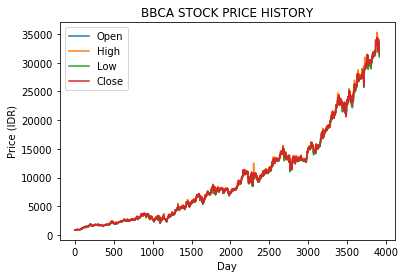

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data['Open'])
plt.plot(data['High'])
plt.plot(data['Low'])
plt.plot(data['Close'])
plt.title("BBCA STOCK PRICE HISTORY")
plt.ylabel("Price (IDR)")
plt.xlabel("Day")
plt.legend(['Open','High', 'Low', 'Close'], loc="upper left")
plt.show

<function matplotlib.pyplot.show>

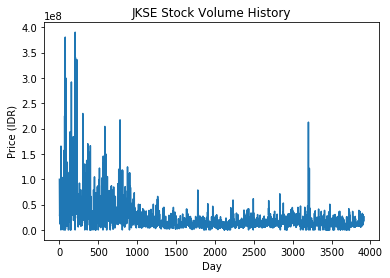

In [ ]:
plt.figure()
plt.plot(data['Volume'])
plt.title("JKSE Stock Volume History")
plt.ylabel("Price (IDR)")
plt.xlabel("Day")
plt.show

In [ ]:
print("check null value (hari yg tidak ada datanya) \n", data.isna().sum())

check null value (hari yg tidak ada datanya) 
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#tidak ada data null
data = data.dropna()

In [ ]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#train_cols = ["Open", "High", "Low", "Close", "Volume"]
train_cols = ["Close"]
data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2, shuffle=False )
print("data_train and data_test size: ", len(data_train), len(data_test))

data_train and data_test size:  3126 782


In [ ]:
#scale data min max
x = data_train.loc[:, train_cols].values  #mengambil semua atribut dalam train_cols
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(data_test.loc[:, train_cols])

x_train

array([[0.00000000e+00],
       [8.24402308e-04],
       [8.24402308e-04],
       ...,
       [9.30750206e-01],
       [9.65375103e-01],
       [9.63726298e-01]])

In [ ]:
import numpy as np

def build_timeseries(mat, y_col_index):
  dim_0 = mat.shape[0] - TIME_STEPS
  dim_1 = mat.shape[1]
  x = np.zeros((dim_0, TIME_STEPS, dim_1))
  y = np.zeros((dim_0,))

  for i in range(dim_0):
    x[i] = mat[i:TIME_STEPS+i]
    y[i] = mat[TIME_STEPS+i, y_col_index]
  
  print("Panjang data time series i/o", x.shape, y.shape)
  return x,y

In [ ]:
def trim_dataset(mat, batch_size):
  no_of_rows_drop = mat.shape[0]%batch_size
  if(no_of_rows_drop > 0):
    return mat[:-no_of_rows_drop]
  else:
    return mat

In [ ]:
TIME_STEPS = 30
BATCH_SIZE = 100
x_t, y_t = build_timeseries(x_train, 0)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test,0)
x_val = trim_dataset(x_temp, BATCH_SIZE)
y_val = trim_dataset(y_temp, BATCH_SIZE)

Panjang data time series i/o (3096, 30, 1) (3096,)
Panjang data time series i/o (752, 30, 1) (752,)


In [ ]:
import tensorflow as tf
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.recurrent import LSTM #long short term memory
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), stateful=True, kernel_initializer='random_uniform'))

lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))



#compile model
lstm_model.compile(loss='mean_squared_error', optimizer='RMSprop')
lstm_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (100, 100)                40800     
_________________________________________________________________
dropout_28 (Dropout)         (100, 100)                0         
_________________________________________________________________
dense_83 (Dense)             (100, 20)                 2020      
_________________________________________________________________
dense_84 (Dense)             (100, 1)                  21        
Total params: 42,841
Trainable params: 42,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train model
nn_train = lstm_model.fit(x_t, y_t, epochs= 100, verbose= 1, batch_size=BATCH_SIZE, shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),trim_dataset(y_val, BATCH_SIZE)))

Train on 3000 samples, validate on 700 samples
Epoch 1/100
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0354 - val_loss: 0.5002
Epoch 2/100
3000/3000 [==============================] - 1s 449us/step - loss: 0.0817 - val_loss: 0.5046
Epoch 3/100
3000/3000 [==============================] - 1s 441us/step - loss: 0.0604 - val_loss: 0.4711
Epoch 4/100
3000/3000 [==============================] - 1s 455us/step - loss: 0.0277 - val_loss: 0.4479
Epoch 5/100
3000/3000 [==============================] - 1s 454us/step - loss: 0.0212 - val_loss: 0.4344
Epoch 6/100
3000/3000 [==============================] - 1s 468us/step - loss: 0.0155 - val_loss: 0.4352
Epoch 7/100
3000/3000 [==============================] - 1s 457us/step - loss: 0.0095 - val_loss: 0.4202
Epoch 8/100
3000/3000 [==============================] - 1s 477us/step - loss: 0.0066 - val_loss: 0.4089
Epoch 9/100
3000/3000 [==============================] - 1s 459us/step - loss: 0.0052 - val_loss: 0.4179
Epoch 10/1

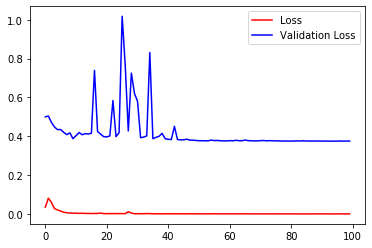

In [ ]:
loss = nn_train.history['loss']
val_loss = nn_train.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', color="red", label="Loss")
plt.plot(epochs, val_loss, 'b', color="blue", label="Validation Loss")
plt.legend()

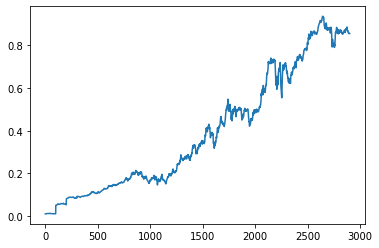

In [ ]:
ramal = lstm_model.predict(x_t, batch_size=100)
plt.plot(ramal)

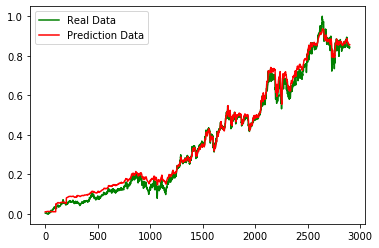

In [ ]:
plt.plot(y_t, color="green", label="Real Data")
plt.plot(ramal, color="red", label="Prediction Data")
plt.legend()